In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from copulas.visualization import compare_2d
from copulas.multivariate import GaussianMultivariate

In [22]:
# --- Imports "oficiales" ---
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from math import sin, pi
from scipy.stats import norm, expon, gamma, laplace  # márgenes + Φ/Φ^{-1}

# Para diagnóstico/visualización con la librería copulas
from copulas.visualization import compare_2d, scatter_2d, compare_3d, scatter_3d
from copulas.multivariate import GaussianMultivariate  # Útil si luego quieres "fit" a datos

In [88]:
df = pd.read_csv('../data/50_Startups.csv')
df.drop(['State', 'Administration'], axis=1, inplace=True)
df = df[(df != 0).all(axis=1)]

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 0 to 46
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        46 non-null     float64
 1   Marketing Spend  46 non-null     float64
 2   Profit           46 non-null     float64
dtypes: float64(3)
memory usage: 1.4 KB
None
           R&D Spend  Marketing Spend         Profit
count      46.000000        46.000000      46.000000
mean    78241.718043    228393.083261  117063.925217
std     43695.348335    111336.691801   35960.003971
min      1000.230000      1903.930000   49490.750000
25%     46117.032500    142431.385000   96537.832500
50%     74661.715000    239452.750000  108643.015000
75%    111370.977500    302423.767500  143590.930000
max    165349.200000    471784.100000  192261.830000


In [89]:
df.head(50)

,R&D Spend,Marketing Spend,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94
5,131876.90,362861.36,156991.12
6,134615.46,127716.82,156122.51
7,130298.13,323876.68,155752.60
8,120542.52,311613.29,152211.77
9,123334.88,304981.62,149759.96


In [85]:
# ---- 3D: comparar dos muestras en (U1, U2, U3)
# fig3d = compare_3d(dfU_real, dfU_synth, columns=['U1','U2','U3'], title='Comparación 3D: U1–U2–U3')
# fig3d.show()

# ---- 3D: una sola muestra
fig3d_single = scatter_3d(df, columns=['R&D Spend','Marketing Spend', 'Profit'], title='Copula Gaussiana — U1–U2–U3')
fig3d_single.show()


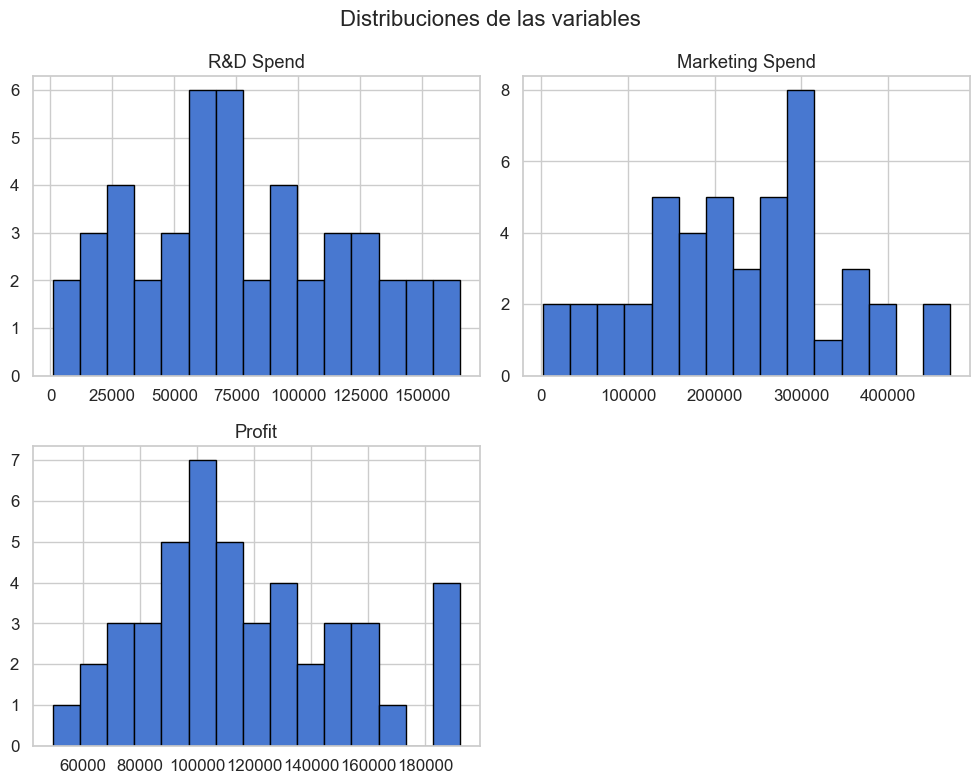

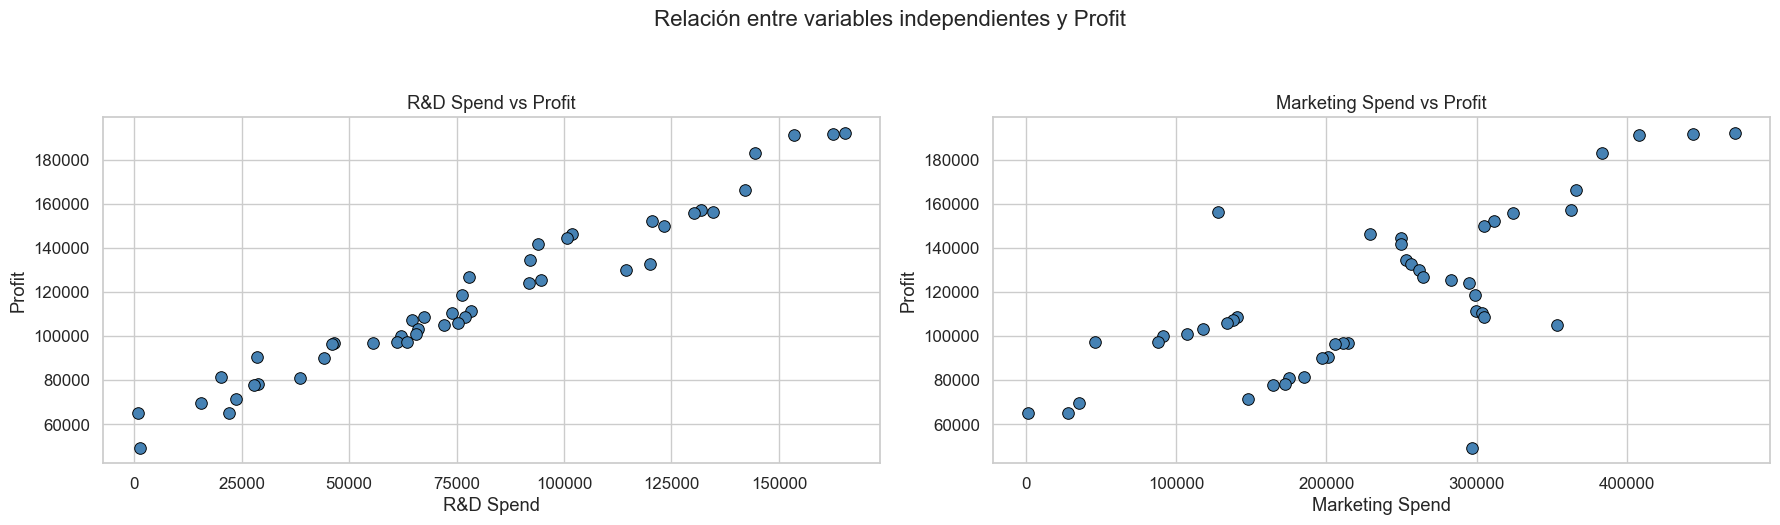

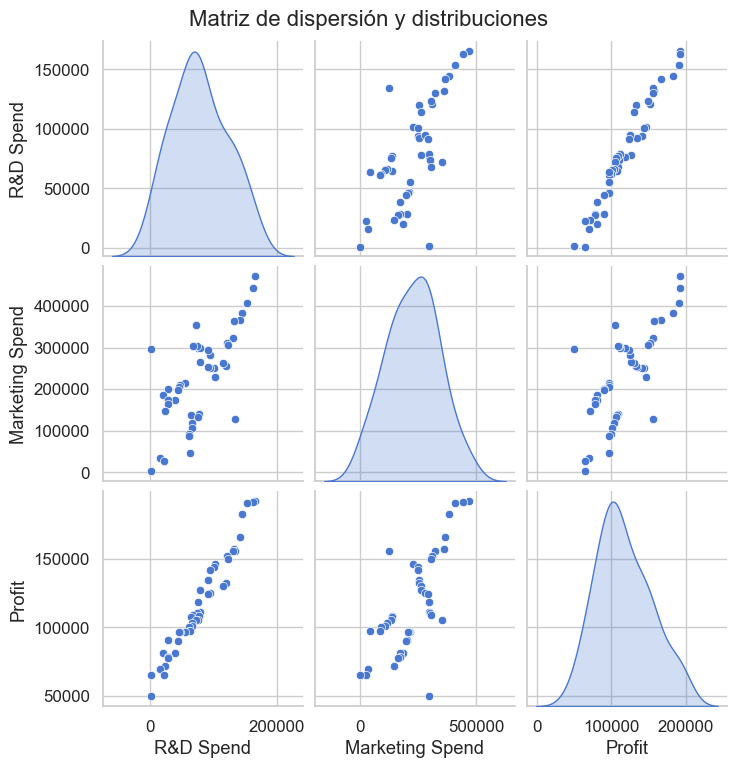

In [91]:
# Configuración de estilo
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# ==========================
# 1. Histogramas de todas las variables
# ==========================
df.hist(bins=15, figsize=(10, 8), edgecolor="black")
plt.suptitle("Distribuciones de las variables", fontsize=16)
plt.tight_layout()
plt.show()

# ==========================
# 2. Scatterplots: cada predictor vs Profit
# ==========================
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

for ax, col in zip(axes, ["R&D Spend", "Marketing Spend"]):
    sns.scatterplot(data=df, x=col, y="Profit", ax=ax, s=70, color="steelblue", edgecolor="black")
    ax.set_title(f"{col} vs Profit")

plt.suptitle("Relación entre variables independientes y Profit", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

# ==========================
# 3. Opcional: Matriz de pares (pairplot)
# ==========================
sns.pairplot(df, diag_kind="kde")
plt.suptitle("Matriz de dispersión y distribuciones", fontsize=16, y=1.02)
plt.show()


In [92]:
import scipy.stats as st

variables = ["R&D Spend", "Marketing Spend", "Profit"]

for col in variables:
    data = df[col]
    print(f"\n=== {col} ===")
    
    # Prueba de normalidad
    stat, p = st.shapiro(data)
    print(f"Shapiro-Wilk Normality Test: p-value = {p:.4f}")
    
    # Ajuste rápido a algunas distribuciones comunes
    # Normal
    mu, sigma = st.norm.fit(data)
    print(f"Normal fit: mu={mu:.2f}, sigma={sigma:.2f}")
    
    # LogNormal
    shape, loc, scale = st.lognorm.fit(data)
    print(f"Lognormal fit: shape={shape:.2f}, loc={loc:.2f}, scale={scale:.2f}")
    
    # Exponencial
    loc, scale = st.expon.fit(data)
    print(f"Exponencial fit: loc={loc:.2f}, scale={scale:.2f}")

        # Laplace (double exponential)
    loc_lap, scale_lap = st.laplace.fit(data)
    print(f"Laplace fit: mu={loc_lap:.2f}, b={scale_lap:.2f}")




=== R&D Spend ===
Shapiro-Wilk Normality Test: p-value = 0.3221
Normal fit: mu=78241.72, sigma=43217.79
Lognormal fit: shape=0.14, loc=-240770.94, scale=316094.63
Exponencial fit: loc=1000.23, scale=77241.49
Laplace fit: mu=74661.71, b=34926.97

=== Marketing Spend ===
Shapiro-Wilk Normality Test: p-value = 0.9115
Normal fit: mu=228393.08, sigma=110119.86
Lognormal fit: shape=0.00, loc=-2147481165.40, scale=2147709555.66
Exponencial fit: loc=1903.93, scale=226489.15
Laplace fit: mu=239452.75, b=90975.79

=== Profit ===
Shapiro-Wilk Normality Test: p-value = 0.1693
Normal fit: mu=117063.93, sigma=35566.99
Lognormal fit: shape=0.22, loc=-41388.33, scale=154529.04
Exponencial fit: loc=49490.75, scale=67573.18
Laplace fit: mu=108643.01, b=28559.10


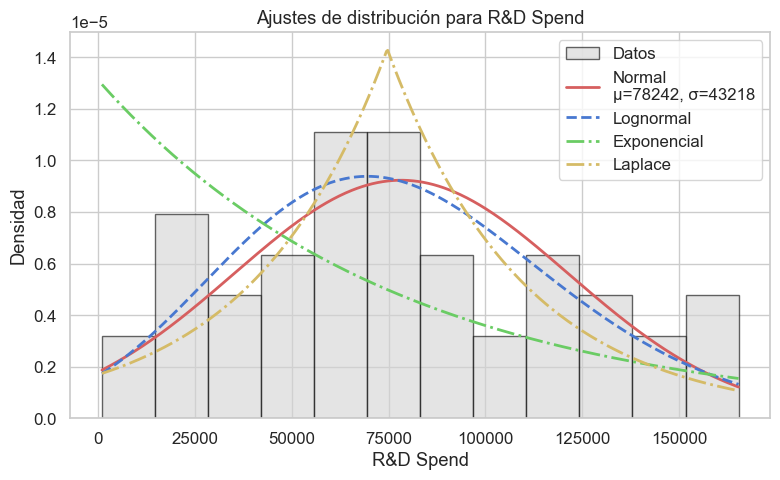

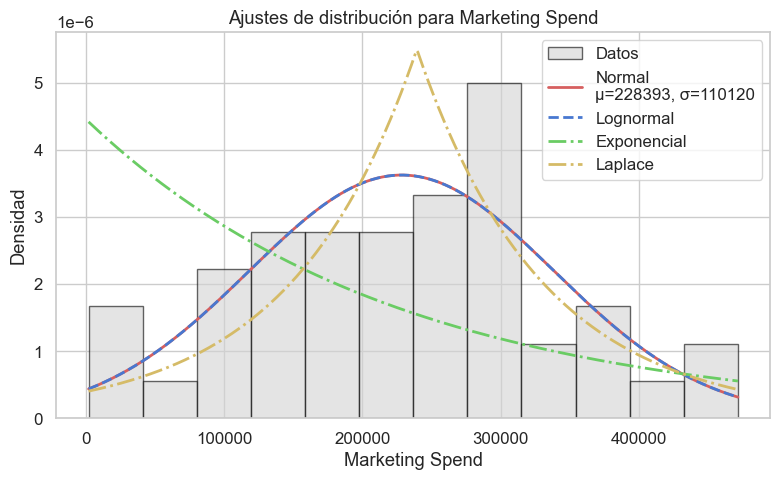

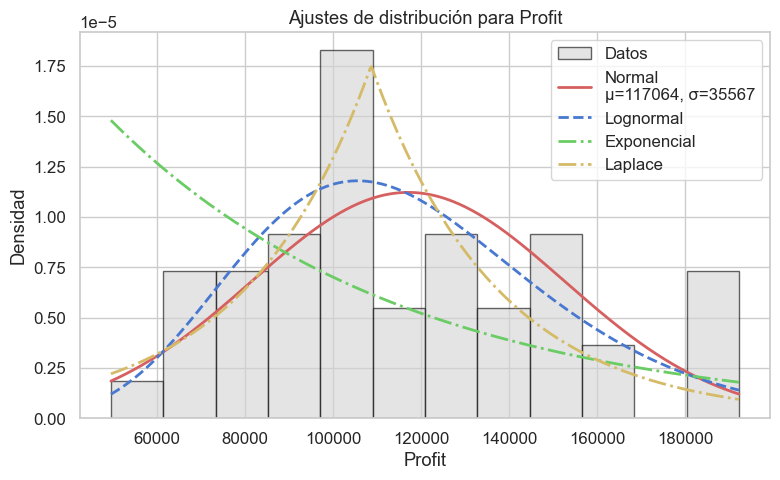

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

variables = ["R&D Spend", "Marketing Spend", "Profit"]

for col in variables:
    data = df[col].values
    x = np.linspace(data.min(), data.max(), 500)

    # Ajustes
    mu, sigma = st.norm.fit(data)
    norm_pdf = st.norm.pdf(x, mu, sigma)

    shape, loc, scale = st.lognorm.fit(data)
    lognorm_pdf = st.lognorm.pdf(x, shape, loc, scale)

    loc_exp, scale_exp = st.expon.fit(data)
    expon_pdf = st.expon.pdf(x, loc_exp, scale_exp)

    loc_lap, scale_lap = st.laplace.fit(data)
    laplace_pdf = st.laplace.pdf(x, loc_lap, scale_lap)

    # Gráfico
    plt.figure(figsize=(8, 5))
    plt.hist(data, bins=12, density=True, alpha=0.6, color="lightgray", edgecolor="black", label="Datos")

    plt.plot(x, norm_pdf, "r-", lw=2, label=f"Normal\nμ={mu:.0f}, σ={sigma:.0f}")
    plt.plot(x, lognorm_pdf, "b--", lw=2, label="Lognormal")
    plt.plot(x, expon_pdf, "g-.", lw=2, label="Exponencial")
    plt.plot(x, laplace_pdf, "y-.", lw=2, label="Laplace")

    plt.title(f"Ajustes de distribución para {col}")
    plt.xlabel(col)
    plt.ylabel("Densidad")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [94]:
import numpy as np
import scipy.stats as st

variables = ["R&D Spend", "Marketing Spend", "Profit"]

for col in variables:
    data = df[col].values
    print(f"\n=== {col} ===")
    results = []

    # Normal
    params_norm = st.norm.fit(data)
    logL_norm = np.sum(st.norm.logpdf(data, *params_norm))
    results.append(("Normal", logL_norm))

    # Lognormal
    params_logn = st.lognorm.fit(data)
    logL_logn = np.sum(st.lognorm.logpdf(data, *params_logn))
    results.append(("Lognormal", logL_logn))

    # Exponential
    params_exp = st.expon.fit(data)
    logL_exp = np.sum(st.expon.logpdf(data, *params_exp))
    results.append(("Exponential", logL_exp))

    # Laplace
    params_lap = st.laplace.fit(data)
    logL_lap = np.sum(st.laplace.logpdf(data, *params_lap))
    results.append(("Laplace", logL_lap))

    # Mostrar ordenado
    results_sorted = sorted(results, key=lambda x: x[1], reverse=True)
    print("Distribución | Log-verosimilitud")
    for name, logL in results_sorted:
        print(f"{name:12s} | {logL:10.2f}")



=== R&D Spend ===
Distribución | Log-verosimilitud
Lognormal    |    -555.95
Normal       |    -556.28
Laplace      |    -559.09
Exponential  |    -563.72

=== Marketing Spend ===
Distribución | Log-verosimilitud
Normal       |    -599.30
Lognormal    |    -599.30
Laplace      |    -603.13
Exponential  |    -613.20

=== Profit ===
Distribución | Log-verosimilitud
Lognormal    |    -546.17
Normal       |    -547.31
Laplace      |    -549.83
Exponential  |    -557.56


In [103]:
from scipy import stats

# R&D Spend ~ Lognormal
x = df["R&D Spend"].values
shape, loc, scale = stats.lognorm.fit(x)
D_rd, p_rd = stats.kstest(x, 'lognorm', args=(shape, loc, scale))
print(f"R&D Spend (Lognormal) KS: D={D_rd:.4f}, p={p_rd:.4f}")

# Marketing Spend ~ Normal
x = df["Marketing Spend"].values
mu, sigma = stats.norm.fit(x)
D_mk, p_mk = stats.kstest(x, 'norm', args=(mu, sigma))
print(f"Marketing Spend (Normal) KS: D={D_mk:.4f}, p={p_mk:.4f}")

# Profit ~ Normal
x = df["Profit"].values
shape, loc, scale = stats.lognorm.fit(x)
D_pr, p_pr = stats.kstest(x, 'lognorm', args=(shape, loc, scale))
print(f"Profit (Lognormal) KS: D={D_pr:.4f}, p={p_pr:.4f}")

R&D Spend (Lognormal) KS: D=0.0804, p=0.9045
Marketing Spend (Normal) KS: D=0.0769, p=0.9293
Profit (Lognormal) KS: D=0.0864, p=0.8535


In [104]:
# Proponer una f.d.p. al proceso, si el investigador tiene información

from copulas.univariate import GaussianUnivariate

dist = GaussianMultivariate(distribution=GaussianUnivariate) # Asignar a los datos la f.d.p. normal univariada
dist.fit(df[['R&D Spend', 'Marketing Spend', 'Profit']])

sampled = dist.sample(50) # generar 1_000 valores

compare_3d(df[['R&D Spend', 'Marketing Spend', 'Profit']], sampled) # mostrar los gráficos para compararlos

In [108]:
import numpy as np
from copulas.multivariate import GaussianMultivariate
from copulas.univariate import GaussianUnivariate

cols = ['R&D Spend', 'Marketing Spend', 'Profit']

# 1) Trabajamos en el espacio donde todas son normales:
df_z = df[cols].copy()
df_z['R&D Spend'] = np.log(df_z['R&D Spend'])   # ahora R&D es ~Normal
df_z['Profit'] = np.log(df_z['Profit'])   # ahora Profit es ~Normal


# 2) Ajusta cópula gaussiana con marginales gaussianas
model = GaussianMultivariate(distribution=GaussianUnivariate)
model.fit(df_z)

# 3) Muestra y retransforma solo R&D
sampled_z = model.sample(50)
sampled = sampled_z.copy()
sampled['R&D Spend'] = np.exp(sampled_z['R&D Spend'])  # vuelve a escala original (lognormal)
sampled['Profit'] = np.exp(sampled_z['Profit'])  # vuelve a escala original (lognormal)

# 4) Compara
compare_3d(df[cols], sampled)



In [109]:
import numpy as np
import pandas as pd
import scipy.stats as st
from copulas.multivariate import GaussianMultivariate
from copulas.univariate import GaussianUnivariate

cols = ['R&D Spend', 'Marketing Spend', 'Profit']
X_real = df[cols].copy()

# ---------- MODELO A: Gaussian marginals en escala original ----------
model_A = GaussianMultivariate(distribution=GaussianUnivariate)
model_A.fit(X_real)
syn_A = model_A.sample(5000)   # más muestras para estabilizar métricas

# ---------- MODELO B: log-transform R&D, Gaussian marginals, re-exp ----------
Xz = X_real.copy()
Xz['R&D Spend'] = np.log(Xz['R&D Spend'])
Xz['Profit'] = np.log(Xz['Profit'])
model_B = GaussianMultivariate(distribution=GaussianUnivariate)
model_B.fit(Xz)
syn_Bz = model_B.sample(5000)
syn_B = syn_Bz.copy()
syn_B['R&D Spend'] = np.exp(syn_Bz['R&D Spend'])
syn_B['Profit'] = np.exp(syn_Bz['Profit'])

# ---------- Funciones auxiliares ----------
def ks_row(real, synth):
    D, p = st.ks_2samp(real, synth)
    return D, p

def corr_frob(C1, C2):
    return np.linalg.norm(C1 - C2, ord='fro')

# ---------- 1) KS por variable ----------
rows = []
for c in cols:
    D_A, p_A = ks_row(X_real[c].values, syn_A[c].values)
    D_B, p_B = ks_row(X_real[c].values, syn_B[c].values)
    rows.append([c, D_A, p_A, D_B, p_B])

ks_table = pd.DataFrame(rows, columns=['Variable','KS_D_A','KS_p_A','KS_D_B','KS_p_B'])

# ---------- 2) Dependencia: Spearman / Kendall + distancia de matrices ----------
real_spr = X_real.corr(method='spearman')
A_spr    = syn_A.corr(method='spearman')
B_spr    = syn_B.corr(method='spearman')

real_knd = X_real.corr(method='kendall')
A_knd    = syn_A.corr(method='kendall')
B_knd    = syn_B.corr(method='kendall')

dep_summary = pd.DataFrame({
    'Metric': ['Spearman Frobenius Δ', 'Kendall Frobenius Δ'],
    'Model A': [corr_frob(real_spr.values, A_spr.values),
                corr_frob(real_knd.values, A_knd.values)],
    'Model B': [corr_frob(real_spr.values, B_spr.values),
                corr_frob(real_knd.values, B_knd.values)]
})

# ---------- 3) Momentos (media / std) ----------
def moments(df_):
    return pd.DataFrame({
        'mean': df_.mean(),
        'std':  df_.std(ddof=1)
    })

mom_real = moments(X_real).rename_axis('Variable')
mom_A    = moments(syn_A).rename_axis('Variable')
mom_B    = moments(syn_B).rename_axis('Variable')

moments_comp = (mom_real
                .join(mom_A, rsuffix=' (A)')
                .join(mom_B, rsuffix=' (B)')
                .reset_index())

# ---------- Mostrar resultados ----------
print("\n=== KS (real vs sintético) por variable ===")
print(ks_table.to_string(index=False))

print("\n=== Dependencia: distancia de matrices (menor es mejor) ===")
print(dep_summary.to_string(index=False))

print("\n=== Momentos (media / std) real vs A vs B ===")
print(moments_comp.to_string(index=False))

# Opcional: ver matrices de Spearman/Kendall
print("\nSpearman real:\n", real_spr.round(3))
print("\nSpearman A:\n", A_spr.round(3))
print("\nSpearman B:\n", B_spr.round(3))



=== KS (real vs sintético) por variable ===
       Variable   KS_D_A   KS_p_A   KS_D_B   KS_p_B
      R&D Spend 0.115296 0.540999 0.222252 0.018522
Marketing Spend 0.076400 0.934230 0.081000 0.902078
         Profit 0.132817 0.364702 0.091870 0.802635

=== Dependencia: distancia de matrices (menor es mejor) ===
              Metric  Model A  Model B
Spearman Frobenius Δ 0.034017 0.368395
 Kendall Frobenius Δ 0.098655 0.483327

=== Momentos (media / std) real vs A vs B ===
       Variable          mean           std      mean (A)       std (A)      mean (B)       std (B)
      R&D Spend  78241.718043  43695.348335  79173.237153  42539.028032  98623.859009 136961.500989
Marketing Spend 228393.083261 111336.691801 229638.759668 109096.950666 227576.617469 110152.886815
         Profit 117063.925217  35960.003971 117630.821760  35012.250464 116616.113479  37655.797217

Spearman real:
                  R&D Spend  Marketing Spend  Profit
R&D Spend            1.000            0.696   0.988
M

In [110]:
import numpy as np
import pandas as pd
import scipy.stats as st
from copulas.multivariate import GaussianMultivariate
from copulas.univariate import GaussianUnivariate

cols = ['R&D Spend','Marketing Spend','Profit']
X = df[cols].copy()

# --- Híbrido (Modelo C): log SOLO Profit ---
Xz = X.copy()
Xz['Profit'] = np.log(Xz['Profit'])

model_C = GaussianMultivariate(distribution=GaussianUnivariate)
model_C.fit(Xz)

syn_Cz = model_C.sample(5000)
syn_C  = syn_Cz.copy()
syn_C['Profit'] = np.exp(syn_Cz['Profit'])

# --- Métricas rápidas ---
def ks_2s(x, y): 
    D, p = st.ks_2samp(x, y); 
    return D, p

print("\nKS (real vs sintético) — Modelo C")
for c in cols:
    D,p = ks_2s(X[c].values, syn_C[c].values)
    print(f"{c:15s}: D={D:.3f}, p={p:.3f}")

def frob(a,b): 
    import numpy as np; 
    return np.linalg.norm(a-b, ord='fro')

real_spr = X.corr(method='spearman').values
C_spr    = syn_C.corr(method='spearman').values
print("\nSpearman Frobenius Δ (menor=mejor):", frob(real_spr, C_spr))



KS (real vs sintético) — Modelo C
R&D Spend      : D=0.102, p=0.686
Marketing Spend: D=0.077, p=0.930
Profit         : D=0.080, p=0.908

Spearman Frobenius Δ (menor=mejor): 0.07440795071657993


In [115]:
import numpy as np
import pandas as pd
from copulas.multivariate import GaussianMultivariate
from copulas.univariate import GaussianUnivariate

# --- columnas que usaremos ---
cols = ['R&D Spend','Marketing Spend','Profit']

# ============= 1) Ajustar el Modelo C (log SOLO Profit) sobre los datos reales ============
X = df[cols].copy()
if (X['Profit'] <= 0).any():
    raise ValueError("Profit debe ser > 0 para aplicar log (revisa datos).")

Xz = X.copy()
Xz['Profit'] = np.log(Xz['Profit'])

model = GaussianMultivariate(distribution=GaussianUnivariate, random_state=123)
model.fit(Xz)

# ============= 2) Muestrear 5,000 observaciones sintéticas y revertir el log en Profit ====
syn_z = model.sample(5000)
syn   = syn_z.copy()
syn['Profit'] = np.exp(syn_z['Profit'])
syn = syn[cols].astype(float)





cols_pos = ['R&D Spend','Marketing Spend']

def resample_nonneg(syn_df, model, batch=2000):
    mask = (syn_df[cols_pos] < 0).any(axis=1)
    n_bad = mask.sum()
    while n_bad > 0:
        # vuelve a samplear en el espacio del modelo (Profit sigue en log)
        add_z = model.sample(max(batch, n_bad))
        add   = add_z.copy()
        add['Profit'] = np.exp(add_z['Profit'])
        # toma tantas filas como negativas queden y reemplaza
        to_take = syn_df.loc[mask].index
        syn_df.loc[to_take, cols_pos] = add.loc[:len(to_take)-1, cols_pos].values
        # recomputa máscara
        mask = (syn_df[cols_pos] < 0).any(axis=1)
        n_bad = mask.sum()
    return syn_df

# usarlo:
syn = resample_nonneg(syn, model)







print("Muestra sintética (primeras filas):")
print(syn.head())
print("\nDescripción sintética:")
print(syn.describe())

# ============= 3) Ajustar una regresión lineal Profit ~ R&D Spend + Marketing Spend =======
from sklearn.linear_model import LinearRegression

X_syn = syn[['R&D Spend','Marketing Spend']].values
y_syn = syn['Profit'].values

lin = LinearRegression()
lin.fit(X_syn, y_syn)

print("\n=== Regresión lineal (scikit-learn) sobre datos sintéticos ===")
print(f"Intercepto: {lin.intercept_:,.4f}")
print(f"Coef R&D Spend: {lin.coef_[0]:,.4f}")
print(f"Coef Marketing Spend: {lin.coef_[1]:,.4f}")
print(f"R^2 (in-sample): {lin.score(X_syn, y_syn):.4f}")

# (Opcional) Resumen estadístico con statsmodels
try:
    import statsmodels.api as sm
    X_sm = sm.add_constant(X_syn)
    ols = sm.OLS(y_syn, X_sm).fit()
    print("\n=== Resumen OLS (statsmodels) ===")
    print(ols.summary())
except Exception as e:
    print("\n(No se pudo imprimir resumen de statsmodels):", e)


Muestra sintética (primeras filas):
       R&D Spend  Marketing Spend         Profit
0  131572.889723    272518.275949  168708.269020
1  127034.705872    403842.231020  178574.762731
2  169002.548020    481203.874605  234726.853877
3  108601.913247    348834.645711  137028.910852
4   12171.372327    125427.009343   66832.742670

Descripción sintética:
           R&D Spend  Marketing Spend         Profit
count    5000.000000      5000.000000    5000.000000
mean    81742.538456    234960.705759  116520.041014
std     38740.559020    101612.595932   36885.925382
min         6.743582      1785.796300   37087.480029
25%     54529.566733    164167.716690   90857.851840
50%     79165.801009    231568.914533  110471.649192
75%    108214.996447    303046.701996  136879.224384
max    242894.992001    705530.924956  370607.972473

=== Regresión lineal (scikit-learn) sobre datos sintéticos ===
Intercepto: 49,331.7602
Coef R&D Spend: 0.8313
Coef Marketing Spend: -0.0033
R^2 (in-sample): 0.7519

===

In [116]:
import numpy as np
import pandas as pd
from scipy.stats import norm, rankdata
from sklearn.linear_model import LinearRegression

# --- columnas ---
cols = ['R&D Spend','Marketing Spend','Profit']
X = df[cols].copy().values
n, d = X.shape

# ===== 1) De datos reales -> U(0,1) por rango (ECDF robusta) =====
U = np.empty_like(X, dtype=float)
for j in range(d):
    r = rankdata(X[:, j], method='average')         # rangos 1..n
    U[:, j] = (r - 0.5) / n                         # en (0,1)

# ===== 2) U -> Z con normal score; estimar correlación =====
Z = norm.ppf(U)
R = np.corrcoef(Z, rowvar=False)
# pequeña regularización por si acaso
R = (R + R.T) / 2
w, V = np.linalg.eigh(R)
w = np.clip(w, 1e-8, None)
R = (V * w) @ V.T
L = np.linalg.cholesky(R)

# ===== 3) Muestrear en Z, volver a U =====
m = 5000
Zs = np.random.randn(m, d) @ L.T
Us = norm.cdf(Zs)

# ===== 4) Inversa ECDF (sin negativos ni fuera de rango) =====
def inv_ecdf(x_real, u):
    x_sorted = np.sort(x_real)
    p = (np.arange(1, len(x_sorted)+1) - 0.5) / len(x_sorted)  # (0,1)
    # interpolación dentro de rango observado (sin extrapolar)
    return np.interp(u, p, x_sorted)

syn = pd.DataFrame({cols[j]: inv_ecdf(X[:, j], Us[:, j]) for j in range(d)})

print("Chequeo rápido (no debería haber negativos en spends):")
print(syn[cols].min())  # R&D y Marketing >= min(real), Profit >= min(real)

# ===== 5) Regresión lineal en sintéticos =====
X_syn = syn[['R&D Spend','Marketing Spend']].values
y_syn = syn['Profit'].values

lin = LinearRegression().fit(X_syn, y_syn)
print("\n=== Regresión lineal en sintéticos (ECDF-copula) ===")
print(f"Intercepto: {lin.intercept_:,.4f}")
print(f"Coef R&D Spend: {lin.coef_[0]:,.4f}")
print(f"Coef Marketing: {lin.coef_[1]:,.4f}")
print(f"R^2 (in-sample): {lin.score(X_syn, y_syn):.4f}")

# (Opcional) compara con reales para ver consistencia
from sklearn.metrics import r2_score
lin_real = LinearRegression().fit(df[['R&D Spend','Marketing Spend']], df['Profit'])
print("\n=== Coeficientes vs REALES ===")
print(f"Intercepto real: {lin_real.intercept_:,.4f}")
print(f"R&D real      : {lin_real.coef_[0]:,.4f}")
print(f"Marketing real: {lin_real.coef_[1]:,.4f}")


Chequeo rápido (no debería haber negativos en spends):
R&D Spend           1000.23
Marketing Spend     1903.93
Profit             49490.75
dtype: float64

=== Regresión lineal en sintéticos (ECDF-copula) ===
Intercepto: 53,944.3122
Coef R&D Spend: 0.7980
Coef Marketing: 0.0030
R^2 (in-sample): 0.9494

=== Coeficientes vs REALES ===
Intercepto real: 51,859.0465
R&D real      : 0.7581
Marketing real: 0.0258


In [120]:
import numpy as np
import pandas as pd
from scipy.stats import norm, rankdata
from sklearn.linear_model import LinearRegression

# ========= 1) Ajuste OLS en datos REALES para fijar la relación Profit ~ X =========
colsX = ['R&D Spend','Marketing Spend']
y = df['Profit'].values
X = df[colsX].values

lin_real = LinearRegression().fit(X, y)
beta0 = lin_real.intercept_
beta  = lin_real.coef_.copy()
resid = y - lin_real.predict(X)

print("Coefs reales:", beta0, beta)

# ========= 2) ECDF + Cópula Gaussiana SOLO para los predictores X =========
n, d = X.shape
U = np.empty_like(X, dtype=float)
for j in range(d):
    r = rankdata(X[:, j], method='average')          # rangos 1..n
    U[:, j] = (r - 0.5) / n                          # (0,1)

Z = norm.ppf(U)                                      # normal scores
R = np.corrcoef(Z, rowvar=False)                     # correlación latente
R = (R + R.T)/2
# Regularización mínima por si hay problemas numéricos:
w, V = np.linalg.eigh(R); w = np.clip(w, 1e-8, None); R = (V * w) @ V.T
L = np.linalg.cholesky(R)

# Muestrear nuevos predictores con la misma dependencia de rango
m = 5000
Zs = np.random.randn(m, d) @ L.T
Us = norm.cdf(Zs)

def inv_ecdf(x_real, u):
    x_sorted = np.sort(x_real)
    p = (np.arange(1, len(x_sorted)+1) - 0.5) / len(x_sorted)
    return np.interp(u, p, x_sorted)

Xs = np.column_stack([inv_ecdf(X[:, j], Us[:, j]) for j in range(d)])

# ========= 3) Generar Profit con el modelo lineal + bootstrap de residuos =========
eps = np.random.choice(resid, size=m, replace=True)
ys  = beta0 + Xs @ beta + eps

syn_reg = pd.DataFrame({'R&D Spend': Xs[:,0],
                        'Marketing Spend': Xs[:,1],
                        'Profit': ys})

# ========= 4) Chequeo rápido: coeficientes y R² en sintético =========
lin_syn = LinearRegression().fit(syn_reg[colsX].values, syn_reg['Profit'].values)
print("\n=== OLS en sintéticos (cópula X + bootstrap e) ===")
print(f"Intercepto: {lin_syn.intercept_:,.4f}")
print(f"Coef R&D   : {lin_syn.coef_[0]:,.4f}")
print(f"Coef Mkt   : {lin_syn.coef_[1]:,.4f}")
print(f"R^2        : {lin_syn.score(syn_reg[colsX].values, syn_reg['Profit'].values):.4f}")



Coefs reales: 51859.04654673276 [0.75805596 0.02580322]

=== OLS en sintéticos (cópula X + bootstrap e) ===
Intercepto: 51,821.8466
Coef R&D   : 0.7626
Coef Mkt   : 0.0249
R^2        : 0.9588


In [123]:
import numpy as np
import pandas as pd
from scipy.stats import norm, rankdata
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# -----------------------------
# 1) Modelo REAL entrenado en los 50 reales
# -----------------------------
colsX = ['R&D Spend','Marketing Spend']
ycol  = 'Profit'

X_real = df[colsX].values
y_real = df[ycol].values

lin_real = LinearRegression().fit(X_real, y_real)
b0_real  = lin_real.intercept_
b_real   = lin_real.coef_
r2_real_in = lin_real.score(X_real, y_real)
mse_real_in  = mean_squared_error(y_real, lin_real.predict(X_real))
rmse_real_in = np.sqrt(mse_real_in)

print("=== Entrenado en REALES (n=50) ===")
print(f"Intercepto: {b0_real:,.4f}")
print(f"Coef R&D   : {b_real[0]:,.6f}")
print(f"Coef Mkt   : {b_real[1]:,.6f}")
print(f"R^2 in-sample: {r2_real_in:.4f} | RMSE in-sample: {rmse_real_in:,.2f}")

# -----------------------------
# 2) Generar SINTÉTICOS con ECDF-cópula para X y bootstrap de residuos para y
# -----------------------------
np.random.seed(123)
n, d = X_real.shape

# (a) U(0,1) por rangos para cada predictor
U = np.empty_like(X_real, dtype=float)
for j in range(d):
    r = rankdata(X_real[:, j], method='average')   # 1..n
    U[:, j] = (r - 0.5) / n                        # (0,1)

# (b) Normal scores + correlación latente + muestreo
Z = norm.ppf(U)
R = np.corrcoef(Z, rowvar=False)
R = (R + R.T)/2
# regularización mínima
w, V = np.linalg.eigh(R)
w = np.clip(w, 1e-8, None)
R = (V * w) @ V.T
L = np.linalg.cholesky(R)

m = 50000
Zs = np.random.randn(m, d) @ L.T
Us = norm.cdf(Zs)

# (c) Inversa ECDF para volver a escala original (sin negativos)
def inv_ecdf(x_real, u):
    xs = np.sort(x_real)
    p  = (np.arange(1, len(xs)+1) - 0.5) / len(xs)
    return np.interp(u, p, xs)

Xs = np.column_stack([inv_ecdf(X_real[:, j], Us[:, j]) for j in range(d)])

# (d) y sintética = modelo real + bootstrap de residuos
resid = y_real - lin_real.predict(X_real)
eps   = np.random.choice(resid, size=m, replace=True)
ys    = b0_real + Xs @ b_real + eps

syn = pd.DataFrame({'R&D Spend': Xs[:,0],
                    'Marketing Spend': Xs[:,1],
                    'Profit': ys})

# -----------------------------
# 3) Modelo SINTÉTICO entrenado en los m sintéticos
# -----------------------------
lin_syn = LinearRegression().fit(syn[colsX].values, syn[ycol].values)
b0_syn  = lin_syn.intercept_
b_syn   = lin_syn.coef_

# Evaluamos AMBOS modelos sobre los 50 datos REALES (test en lo real)
r2_real_test_syn = lin_syn.score(X_real, y_real)
mse_real_test_syn  = mean_squared_error(y_real, lin_syn.predict(X_real))
rmse_real_test_syn = np.sqrt(mse_real_test_syn)

print("\n=== Entrenado en SINTÉTICOS (n=50000) ===")
print(f"Intercepto: {b0_syn:,.4f}")
print(f"Coef R&D   : {b_syn[0]:,.6f}")
print(f"Coef Mkt   : {b_syn[1]:,.6f}")

print("\n=== Evaluación sobre los 50 REALES (como test) ===")
print(f"Modelo REAL -> R^2: {r2_real_in:.4f} | RMSE: {rmse_real_in:,.2f}")
print(f"Modelo SINT -> R^2: {r2_real_test_syn:.4f} | RMSE: {rmse_real_test_syn:,.2f}")

# Comparativa de coeficientes
print("\n=== Diferencias de coeficientes (SINT - REAL) ===")
print(f"Δ Intercepto: {b0_syn - b0_real:,.4f}")
print(f"Δ R&D       : {b_syn[0] - b_real[0]:,.6f}")
print(f"Δ Marketing : {b_syn[1] - b_real[1]:,.6f}")


=== Entrenado en REALES (n=50) ===
Intercepto: 51,859.0465
Coef R&D   : 0.758056
Coef Mkt   : 0.025803
R^2 in-sample: 0.9591 | RMSE in-sample: 7,194.30

=== Entrenado en SINTÉTICOS (n=50000) ===
Intercepto: 51,910.5165
Coef R&D   : 0.757350
Coef Mkt   : 0.025905

=== Evaluación sobre los 50 REALES (como test) ===
Modelo REAL -> R^2: 0.9591 | RMSE: 7,194.30
Modelo SINT -> R^2: 0.9591 | RMSE: 7,194.37

=== Diferencias de coeficientes (SINT - REAL) ===
Δ Intercepto: 51.4700
Δ R&D       : -0.000706
Δ Marketing : 0.000102
